In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/태블로공유폴더/작업/아파트 상세정보   실거래가 데이터/세종시_아파트_데이터_생활권과_지수적용가격.csv')
df

,난방방식,연면적,동수,복도유형,주거전용면적,주차관제,총세대수,용적률,건폐율,저층,고층,전용면적,거래시아파트나이,계약년월,세대당주차대수,생활권1,생활권2,생활권3,생활권4,기타,거래금액,반복매매지수,보정가격
0,0,206412.34,17,0,104167.151,1,1111,181,20,9,29,96.788,0,201907,1.64,0,0,0,1,0,52000,1.112347,46748.001947
1,0,206412.34,17,0,104167.151,1,1111,181,20,9,29,84.454,0,201909,1.64,0,0,0,1,0,44325,1.123978,39435.827339
2,0,206412.34,17,0,104167.151,1,1111,181,20,9,29,84.454,0,201911,1.64,0,0,0,1,0,54800,1.113912,49195.967446
3,0,206412.34,17,0,104167.151,1,1111,181,20,9,29,84.454,0,201911,1.64,0,0,0,1,0,45568,1.113912,40908.062857
4,0,206412.34,17,0,104167.151,1,1111,181,20,9,29,84.776,0,201911,1.64,0,0,0,1,0,49239,1.113912,44203.654034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20213,1,13646.00,1,1,10908.200,0,176,282,32,10,12,59.400,25,202101,0.40,0,0,0,0,1,5000,1.606200,3112.936414
20214,1,13646.00,1,1,10908.200,0,176,282,32,10,12,59.400,25,202102,0.40,0,0,0,0,1,5000,1.624667,3077.554411
20215,1,13646.00,1,1,10908.200,0,176,282,32,10,12,59.400,25,202102,0.40,0,0,0,0,1,6300,1.624667,3877.718557
20216,1,13646.00,1,1,10908.200,0,176,282,32,10,12,82.090,25,202103,0.40,0,0,0,0,1,9000,1.646532,5466.035397


In [ ]:
# df['가격대'] = df['보정가격'] // 20000
# df.loc[df['가격대'] == 6.0, '보정가격'] = 5.0
# dfs = {}
# prices = []
# for contractP, df_ in df.groupby('가격대'):
#     prices.append(contractP)
#     dfs[contractP] = df_
# trains = {}
# tests = {}
# for i in prices:
#     trains[i], tests[i] = train_test_split(dfs[i].drop(columns=["계약년월","거래금액","반복매매지수"]), test_size=0.2, shuffle=True, random_state=56)
# pd.concat(trains).swaplevel(0,1)
# pd.concat(test).swaplevel(0,1)

In [ ]:
X.columns

In [ ]:
X = df.drop(columns=["연면적","주거전용면적","계약년월","거래금액","반복매매지수","가격대"])

In [ ]:
def fair_split(X, random_state=i):
    X0_2 = X[X["보정가격"]<20000].drop(columns=["보정가격"])
    X2_4 = X[(X["보정가격"]>=20000) & (X["보정가격"]<40000)].drop(columns=["보정가격"])
    X4_6 = X[(X["보정가격"]>=40000) & (X["보정가격"]<60000)].drop(columns=["보정가격"])
    X6_8 = X[(X["보정가격"]>=60000) & (X["보정가격"]<80000)].drop(columns=["보정가격"])
    X8_10 = X[(X["보정가격"]>=80000) & (X["보정가격"]<100000)].drop(columns=["보정가격"])
    X10_ = X[X["보정가격"]>=100000].drop(columns=["보정가격"])

    y0_2 = X[X["보정가격"]<20000]["보정가격"]
    y2_4 = X[(X["보정가격"]>=20000) & (X["보정가격"]<40000)]["보정가격"]
    y4_6 = X[(X["보정가격"]>=40000) & (X["보정가격"]<60000)]["보정가격"]
    y6_8 = X[(X["보정가격"]>=60000) & (X["보정가격"]<80000)]["보정가격"]
    y8_10 = X[(X["보정가격"]>=80000) & (X["보정가격"]<100000)]["보정가격"]
    y10_ = X[X["보정가격"]>=100000]["보정가격"]

    X_train1, X_test1, y_train1, y_test1 = train_test_split(X0_2, y0_2, test_size = 0.2, random_state=i)
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X2_4, y2_4, test_size = 0.2, random_state=i)
    X_train3, X_test3, y_train3, y_test3 = train_test_split(X4_6, y4_6, test_size = 0.2, random_state=i)
    X_train4, X_test4, y_train4, y_test4 = train_test_split(X6_8, y6_8, test_size = 0.2, random_state=i)
    X_train5, X_test5, y_train5, y_test5 = train_test_split(X8_10, y8_10, test_size = 0.2, random_state=i)
    X_train6, X_test6, y_train6, y_test6 = train_test_split(X10_, y10_, test_size = 0.2, random_state=i)

    X_train = pd.concat([X_train1,X_train2,X_train3,X_train4,X_train5,X_train6])
    X_test = pd.concat([X_test1,X_test2,X_test3,X_test4,X_test5,X_test6])
    y_train = pd.concat([y_train1,y_train2,y_train3,y_train4,y_train5,y_train6])
    y_test = pd.concat([y_test1,y_test2,y_test3,y_test4,y_test5,y_test6])
    return X_train, X_test, y_train, y_test

In [ ]:
for i in range(1, 25):
    model_score = 0
    for j in range(0, 20):
        X_train, X_test, y_train, y_test = fair_split(X, random_state=j)
        regressor_test = KNeighborsRegressor(n_neighbors = i)
        regressor_test.fit(X_train, y_train)
        model_score += regressor_test.score(X_test, y_test)
    print('k =', i, '   score =', model_score/20)

k = 1    score = 0.8770724965300719
k = 2    score = 0.9044267125670847
k = 3    score = 0.911642493910969
k = 4    score = 0.9203203823465905
k = 5    score = 0.9276678102084082
k = 6    score = 0.9207487879540984
k = 7    score = 0.9213809350439848
k = 8    score = 0.9234907940223845
k = 9    score = 0.9214998474006485
k = 10    score = 0.9238449368289942
k = 11    score = 0.9179327208073463
k = 12    score = 0.9243987239655279
k = 13    score = 0.914598809194246
k = 14    score = 0.9207671555815171
k = 15    score = 0.9085473612210893
k = 16    score = 0.9154929494960152
k = 17    score = 0.9045495113383965
k = 18    score = 0.9130972433503357
k = 19    score = 0.9168160492237355
k = 20    score = 0.9051617571222309
k = 21    score = 0.9073894679716827
k = 22    score = 0.9011378818913679
k = 23    score = 0.8994825569017305
k = 24    score = 0.9093285639247352


In [ ]:
for i in range(1, 25):
    model_score = 0
    for j in range(0, 20):
        X_train, X_test, y_train, y_test = fair_split(X, random_state=j)
        regressor_test = KNeighborsRegressor(n_neighbors = i, weights = 'distance')
        regressor_test.fit(X_train, y_train)
        model_score += regressor_test.score(X_test, y_test)
    print('k =', i, '   score =', model_score/20)

k = 1    score = 0.8770724965300719
k = 2    score = 0.9030336052300892
k = 3    score = 0.9123892793978868
k = 4    score = 0.9216681751374466
k = 5    score = 0.9236281346039344
k = 6    score = 0.9232319622991089
k = 7    score = 0.9256136985135515
k = 8    score = 0.9220764293057456
k = 9    score = 0.9291640699881952
k = 10    score = 0.9306882297477512
k = 11    score = 0.9227994403289316
k = 12    score = 0.9315508359513357
k = 13    score = 0.9252669415825553
k = 14    score = 0.9297360820665922
k = 15    score = 0.9259328299665338
k = 16    score = 0.9276936728216467
k = 17    score = 0.9192636988829218
k = 18    score = 0.9271265308123281
k = 19    score = 0.9338248129425576
k = 20    score = 0.924797631855004
k = 21    score = 0.925539768626425
k = 22    score = 0.9197880825314787
k = 23    score = 0.9254296582588865
k = 24    score = 0.9295573024272891


In [ ]:
regressor = KNeighborsRegressor(n_neighbors = 10, weights='distance')
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('MAE :', mean_absolute_error(y_test, y_predict))
print('MSE :', mean_squared_error(y_test, y_predict))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_predict)))

MAE : 2502.622850611909
MSE : 15638566.71814009
RMSE : 3954.5627720571197


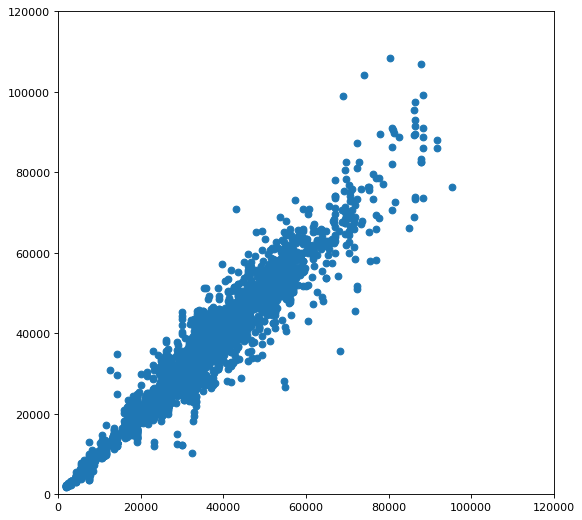

In [ ]:
plt.figure(figsize=(8, 8), dpi=80)
plt.xlim([0, 120000])
plt.ylim([0, 120000])
plt.scatter(y_predict, y_test)

In [ ]:
df["난방방식"].unique()

In [ ]:
newAptInfo = pd.read_csv('/content/drive/MyDrive/2021_창의학기제/신축아파트_세종 - 시트1.csv')

new_test = newAptInfo[['난방방식', '동수', '복도유형', '주차관제', '총세대수', '용적률',
                       '건폐율', '저층', '고층', '전용면적', '거래시아파트나이', '세대당주차대수',
                       '생활권1', '생활권2', '생활권3', '생활권4', '기타']]
new_test['난방방식'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:
new_test

,난방방식,동수,복도유형,주차관제,총세대수,용적률,건폐율,저층,고층,전용면적,거래시아파트나이,세대당주차대수,생활권1,생활권2,생활권3,생활권4,기타
0,1,12,0,1,661,300.0,37.00,5,45,84.0,0,1.60,0,1,0,0,0
1,1,8,0,1,845,278.0,32.00,11,48,84.0,0,1.66,0,1,0,0,0
2,1,9,0,1,771,270.0,33.00,32,37,84.0,0,1.70,0,1,0,0,0
3,1,5,0,1,370,324.0,38.00,5,49,84.0,0,1.50,0,1,0,0,0
4,1,9,0,1,612,176.0,20.00,9,29,84.0,0,1.30,0,0,0,1,0
5,1,18,0,1,1200,143.0,16.00,4,25,105.0,0,1.50,0,0,0,1,0
6,1,6,0,1,318,146.0,19.00,8,20,67.5,0,1.24,0,0,0,1,0
7,1,9,0,1,508,151.0,18.00,8,20,77.0,0,1.39,0,0,0,1,0
8,1,6,0,1,338,151.0,19.00,7,20,79.0,0,1.32,0,0,0,1,0
9,1,7,0,1,499,181.0,19.00,10,29,77.0,0,1.40,0,0,0,1,0


In [ ]:
new_predict = regressor.predict(new_test)
new_predict

array([43373.98186885, 17449.44530362, 17592.76895445, 23215.81076422,
       37689.66174463, 30958.9861096 , 33243.12804345, 48507.3796838 ,
       44051.38298461, 26098.7694876 , 22290.2734274 , 43717.1840597 ,
       10887.58807634, 43373.73781188, 32474.44429172])

In [ ]:
new_test['predict'] = new_predict 
new_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,난방방식,동수,복도유형,주차관제,총세대수,용적률,건폐율,저층,고층,전용면적,거래시아파트나이,세대당주차대수,생활권1,생활권2,생활권3,생활권4,기타,predict
0,1,12,0,1,661,300.0,37.00,5,45,84.0,0,1.60,0,1,0,0,0,43373.981869
1,1,8,0,1,845,278.0,32.00,11,48,84.0,0,1.66,0,1,0,0,0,17449.445304
2,1,9,0,1,771,270.0,33.00,32,37,84.0,0,1.70,0,1,0,0,0,17592.768954
3,1,5,0,1,370,324.0,38.00,5,49,84.0,0,1.50,0,1,0,0,0,23215.810764
4,1,9,0,1,612,176.0,20.00,9,29,84.0,0,1.30,0,0,0,1,0,37689.661745
5,1,18,0,1,1200,143.0,16.00,4,25,105.0,0,1.50,0,0,0,1,0,30958.986110
6,1,6,0,1,318,146.0,19.00,8,20,67.5,0,1.24,0,0,0,1,0,33243.128043
7,1,9,0,1,508,151.0,18.00,8,20,77.0,0,1.39,0,0,0,1,0,48507.379684
8,1,6,0,1,338,151.0,19.00,7,20,79.0,0,1.32,0,0,0,1,0,44051.382985
9,1,7,0,1,499,181.0,19.00,10,29,77.0,0,1.40,0,0,0,1,0,26098.769488


In [ ]:
X_test[y_predict >= 90000]

,난방방식,동수,복도유형,주차관제,총세대수,용적률,건폐율,저층,고층,전용면적,거래시아파트나이,세대당주차대수,생활권1,생활권2,생활권3,생활권4,기타
3689,0,5,0,1,222,183,23,10,24,107.7324,3,1.77,0,1,0,0,0
1498,0,13,0,1,849,171,22,10,30,99.2501,2,1.70,0,0,1,0,0
1468,0,13,0,1,849,171,22,10,30,99.2501,2,1.70,0,0,1,0,0


In [ ]:
np.max(y_predict)

95279.86179311792

In [ ]:
regressor_c = KNeighborsRegressor(metric='manhattan', n_jobs = 1, n_neighbors = 23, weights='distance')
regressor_c.fit(X_train, y_train)
y_predict_c = regressor_c.predict(X_test)

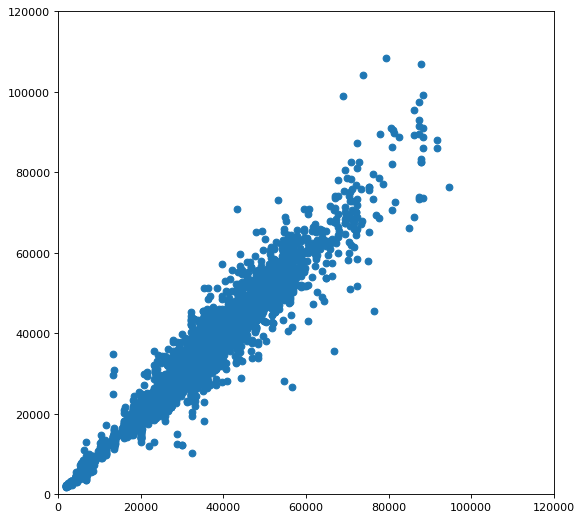

In [ ]:
plt.figure(figsize=(8, 8), dpi=80)
plt.xlim([0, 120000])
plt.ylim([0, 120000])
plt.scatter(y_predict_c, y_test)

In [ ]:
new_test_c = new_test.drop('predict', axis = 1)
new_predict_c = regressor_c.predict(new_test_c)
new_test_c['predict'] = new_predict_c
new_test_c

,난방방식,동수,복도유형,주차관제,총세대수,용적률,건폐율,저층,고층,전용면적,거래시아파트나이,세대당주차대수,생활권1,생활권2,생활권3,생활권4,기타,predict
0,1,12,0,1,661,300.0,37.00,5,45,84.0,0,1.60,0,1,0,0,0,36184.534995
1,1,8,0,1,845,278.0,32.00,11,48,84.0,0,1.66,0,1,0,0,0,69779.235348
2,1,9,0,1,771,270.0,33.00,32,37,84.0,0,1.70,0,1,0,0,0,17385.304166
3,1,5,0,1,370,324.0,38.00,5,49,84.0,0,1.50,0,1,0,0,0,16594.368244
4,1,9,0,1,612,176.0,20.00,9,29,84.0,0,1.30,0,0,0,1,0,38610.042441
5,1,18,0,1,1200,143.0,16.00,4,25,105.0,0,1.50,0,0,0,1,0,32983.092115
6,1,6,0,1,318,146.0,19.00,8,20,67.5,0,1.24,0,0,0,1,0,34900.915443
7,1,9,0,1,508,151.0,18.00,8,20,77.0,0,1.39,0,0,0,1,0,50282.178835
8,1,6,0,1,338,151.0,19.00,7,20,79.0,0,1.32,0,0,0,1,0,44882.740822
9,1,7,0,1,499,181.0,19.00,10,29,77.0,0,1.40,0,0,0,1,0,26397.169150


In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_standardScaled = scaler.transform(X_train)
# X_train_standardScaled